<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/cwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sys
import h5py #librerua para crear archivos , h5py
import pandas as pd
import math

In [4]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [2]:
def get_lengths_array(coeffs):
    sample_counts= [len(arr) for arr in coeffs]
    time_arrays = [np.linspace(0, 1, num=samples, endpoint=False) for samples in sample_counts]
    return time_arrays

In [24]:
def plot_multiple_graphs_separate(time_arrays, coeffs):
    for i, (time_array, coeff) in enumerate(zip(time_arrays, coeffs)):
        label = f'Graph {i}'
        plt.figure()  # Create a new plot window for each graph
        plt.plot(time_array, coeff, label=label, color='red')  # You can change the color as needed
        plt.xlabel('Time')
        plt.ylabel('Coefficient Value')
        plt.legend()
        plt.title(f'Graph {i}')
        plt.show()  # Display the current plot window

In [27]:
def plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2):
    num_graphs = len(time_arrays_1)

    for i in range(num_graphs):
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

        # Plot the first set (time_arrays_1 vs coeffs_1)
        plt.subplot(1, 2, 1)
        plt.plot(time_arrays_1[i], coeffs_1[i], label=f'Graph {i}', color='red')
        plt.xlabel('Time')
        plt.ylabel('Coefficient Value')
        plt.legend()
        plt.title(f'Graph {i} - Set 1')

        # Plot the second set (time_arrays_2 vs coeffs_2)
        plt.subplot(1, 2, 2)
        plt.plot(time_arrays_2[i], coeffs_2[i], label=f'Graph {i}', color='blue')
        plt.xlabel('Time')
        plt.ylabel('Coefficient Value')
        plt.legend()
        plt.title(f'Graph {i} - Set 2')

        plt.tight_layout()  # Adjust the layout for better visualization
        plt.show()  # Display the current plot window


In [39]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [9]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [48]:
 print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [49]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [44]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0)
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [54]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) + 1

Available files:
1. vibration_ball_0
2. vibration_ball_1
3. vibration_ball_2
4. vibration_ball_constant
5. vibration_inner_0
6. vibration_inner_1
7. vibration_inner_2
8. vibration_inner_constant
9. vibration_normal_0
10. vibration_normal_1
11. vibration_normal_2
12. vibration_normal_constant
13. vibration_outer_0
14. vibration_outer_1
15. vibration_outer_2
16. vibration_outer_constant
Enter the index of the file you want to plot: 5


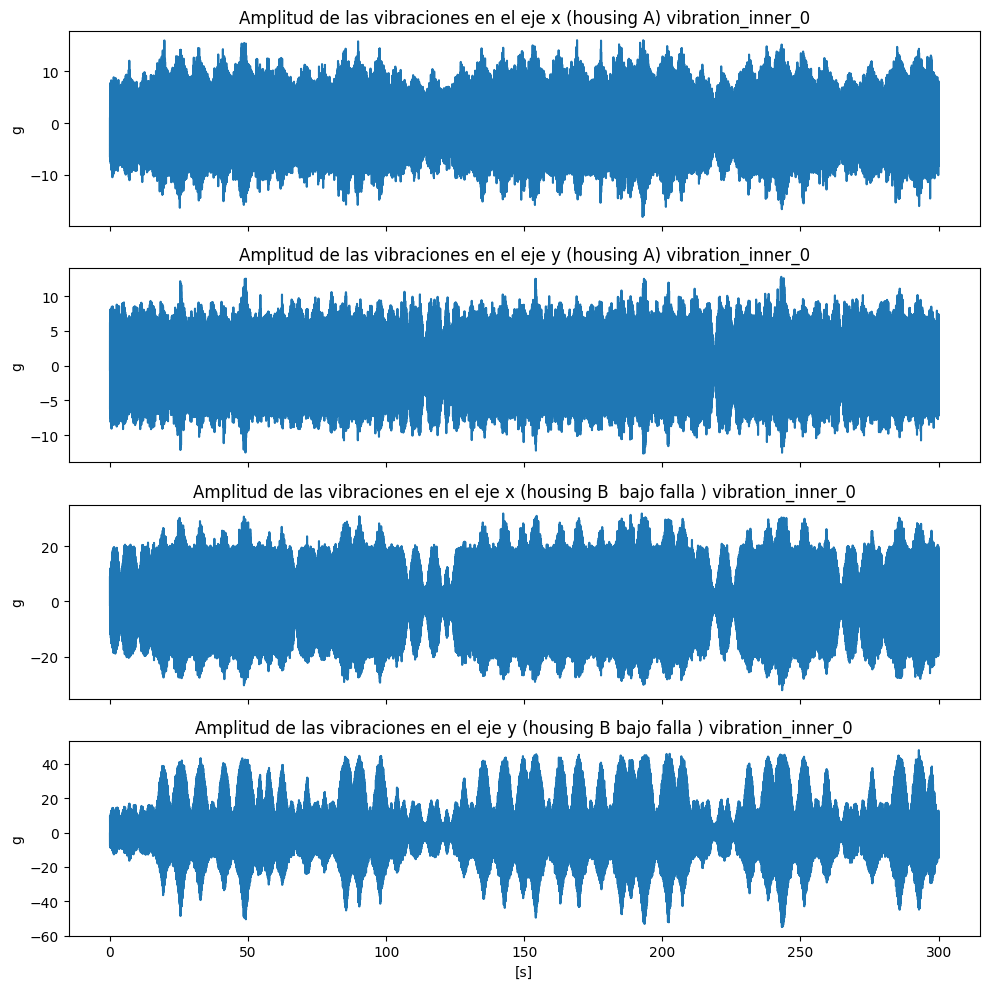

In [34]:
time_array=graficador.plot_data_from_h5py(output_file[1])

In [35]:
h5py_file =output_file[1]
with h5py.File(h5py_file, 'r') as h5_file:
  keys = list(h5_file.keys())
  selected_key = keys[4]
  selected_data = h5_file[selected_key][:]

selected_key


'vibration_inner_0'

In [36]:
##3 grafico del housing B en el eje x  sano
w = pywt.Wavelet('db38')
signal_healty=selected_data[:,2]
level = pywt.dwt_max_level(data_len=len(signal_healty), filter_len=w.dec_len)
# # Perform DWT
coeffs_1 = pywt.wavedec(signal_healty, w, level=level)
time_arrays_1=get_lengths_array(coeffs_1)

Available files:
1. 0Nm_BPFI_03
2. 0Nm_BPFI_10
3. 0Nm_BPFI_30
4. 0Nm_BPFO_03
5. 0Nm_BPFO_10
6. 0Nm_BPFO_30
7. 0Nm_Misalign_01
8. 0Nm_Misalign_03
9. 0Nm_Misalign_05
10. 0Nm_Normal
11. 0Nm_Unbalance_0583mg
12. 0Nm_Unbalance_1169mg
13. 0Nm_Unbalance_1751mg
14. 0Nm_Unbalance_2239mg
15. 0Nm_Unbalance_3318mg
16. 2Nm_BPFI_03
17. 2Nm_BPFI_10
18. 2Nm_BPFI_30
19. 2Nm_BPFO_03
20. 2Nm_BPFO_10
21. 2Nm_BPFO_30
22. 2Nm_Misalign_01
23. 2Nm_Misalign_03
24. 2Nm_Misalign_05
25. 2Nm_Normal
26. 2Nm_Unbalalnce_0583mg
27. 2Nm_Unbalalnce_1169mg
28. 2Nm_Unbalalnce_1751mg
29. 2Nm_Unbalalnce_2239mg
30. 2Nm_Unbalalnce_3318mg
31. 4Nm_BPFI_03
32. 4Nm_BPFI_10
33. 4Nm_BPFI_30
34. 4Nm_BPFO_03
35. 4Nm_BPFO_10
36. 4Nm_BPFO_30
37. 4Nm_Misalign_01
38. 4Nm_Misalign_03
39. 4Nm_Misalign_05
40. 4Nm_Normal
41. 4Nm_Unbalance_0583mg
42. 4Nm_Unbalance_1169mg
43. 4Nm_Unbalance_1751mg
44. 4Nm_Unbalance_2239mg
45. 4Nm_Unbalance_3318mg
Enter the index of the file you want to plot: 23
Do you want an interactive graph? (yes/no): no


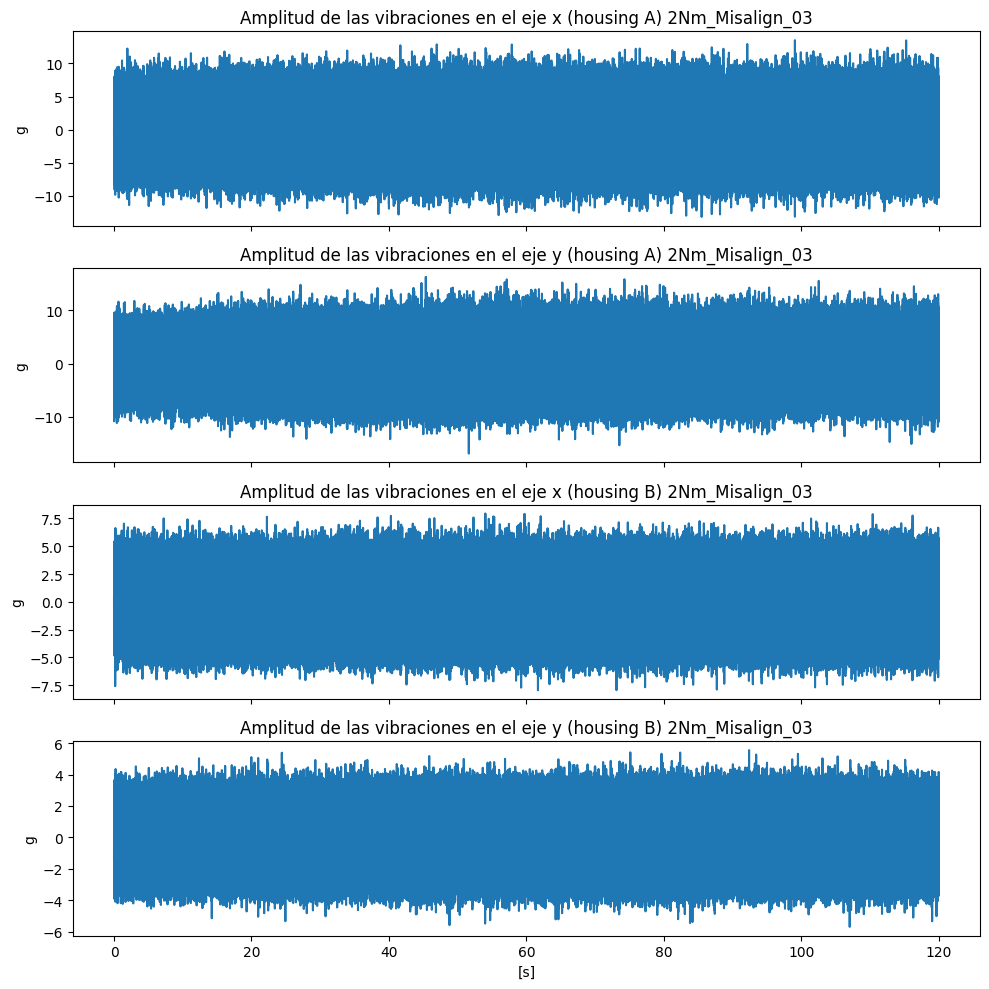

In [55]:
time_array=graficador.plot_data_from_h5py(output_file[0])

In [31]:
h5py_file =output_file[1]
with h5py.File(h5py_file, 'r') as h5_file:
  keys = list(h5_file.keys())
  selected_key_fault = keys[8]
  selected_data_fault = h5_file[selected_key_fault][:]

selected_key_fault


'vibration_normal_0'

In [37]:

w = pywt.Wavelet('db38')
signal_faulty= selected_data_fault[:,2]
level = pywt.dwt_max_level(data_len=len(signal_faulty), filter_len=w.dec_len)
# # Perform DWT
coeffs_2 = pywt.wavedec(signal_faulty, w, level=level)
time_arrays_2=get_lengths_array(coeffs_2)

In [16]:
level

16

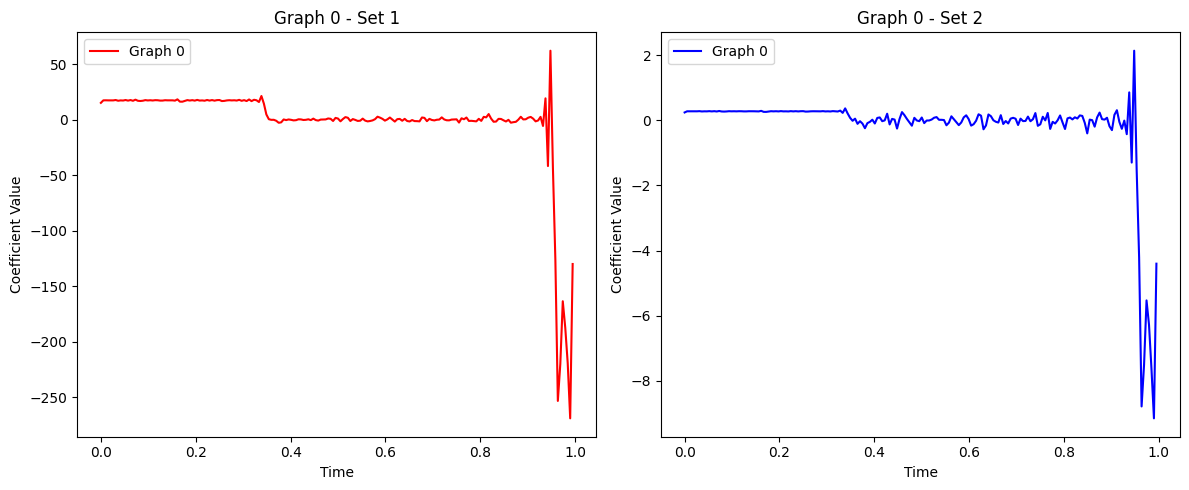

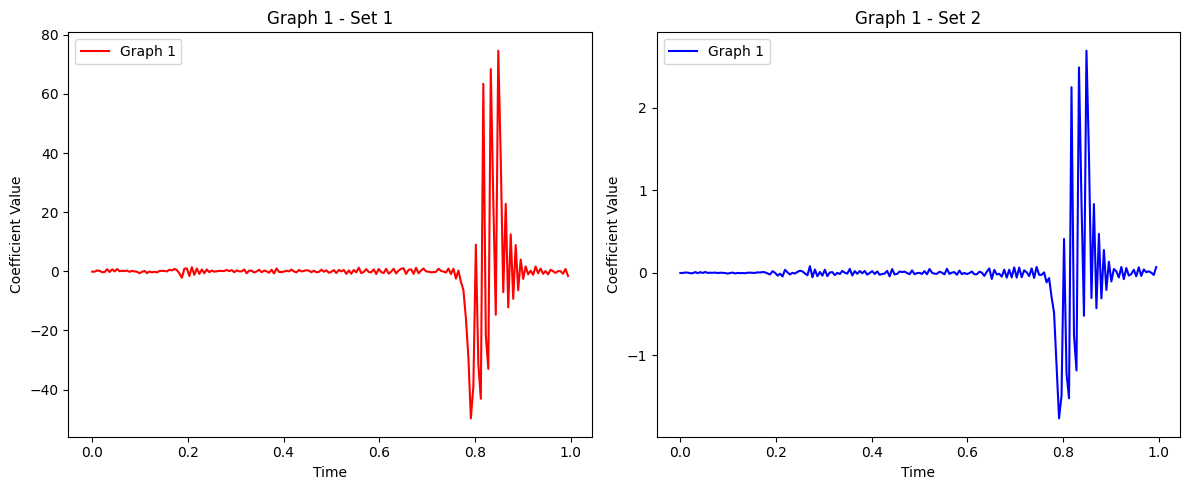

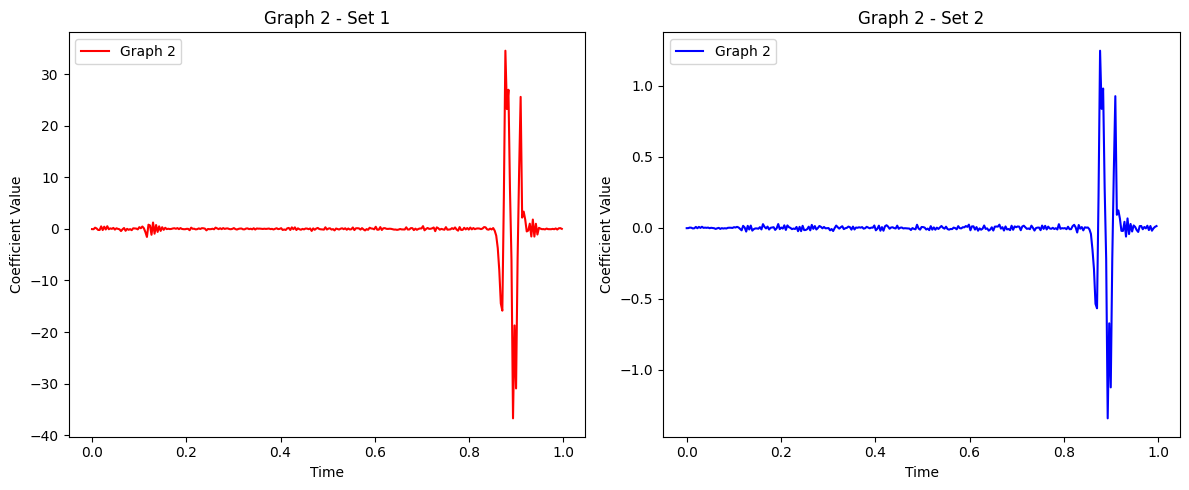

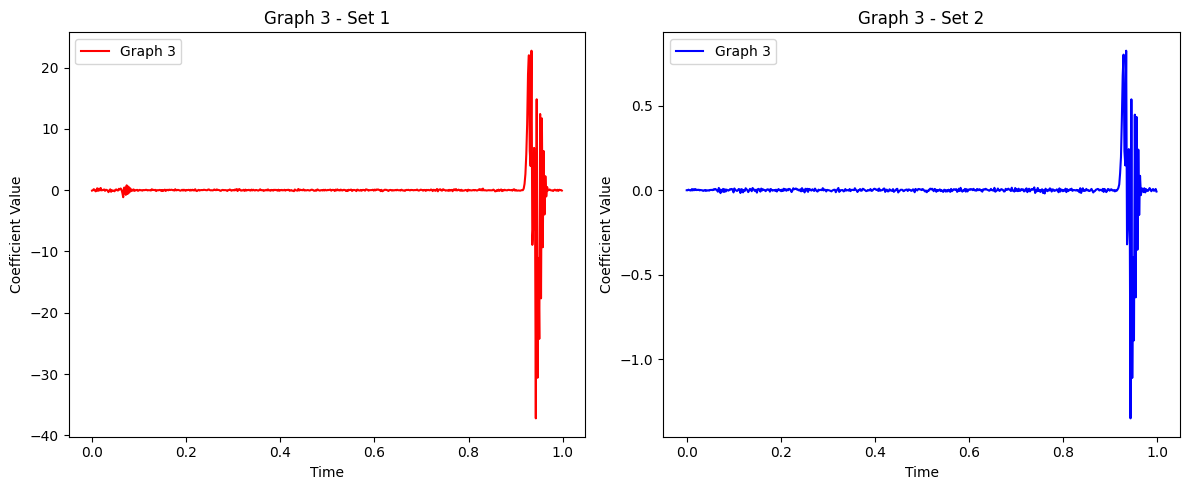

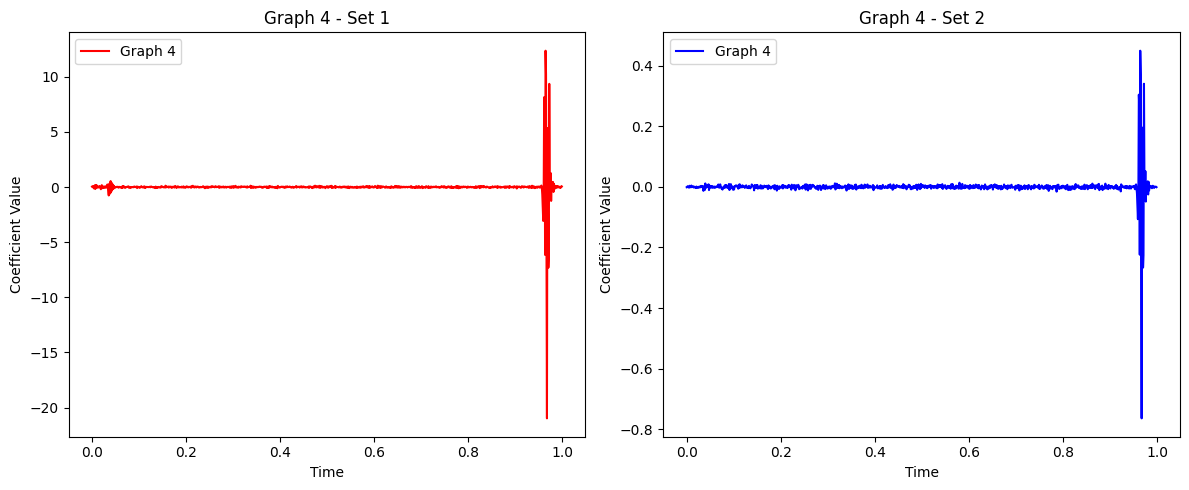

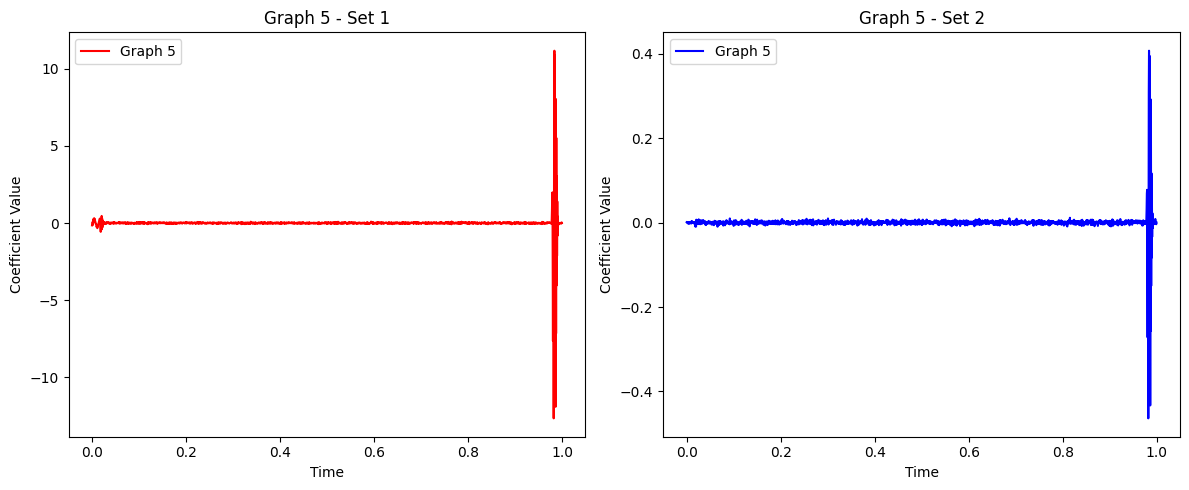

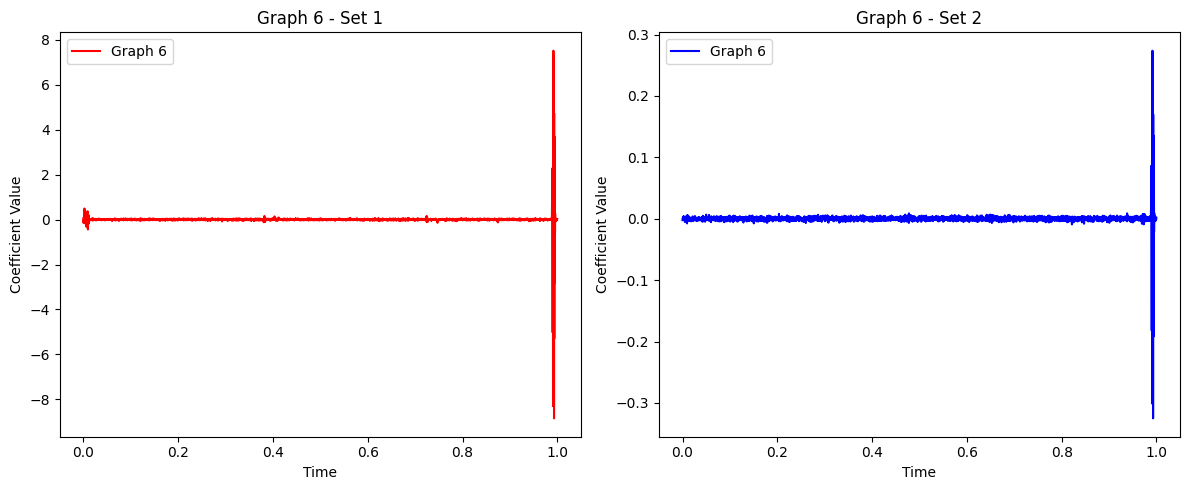

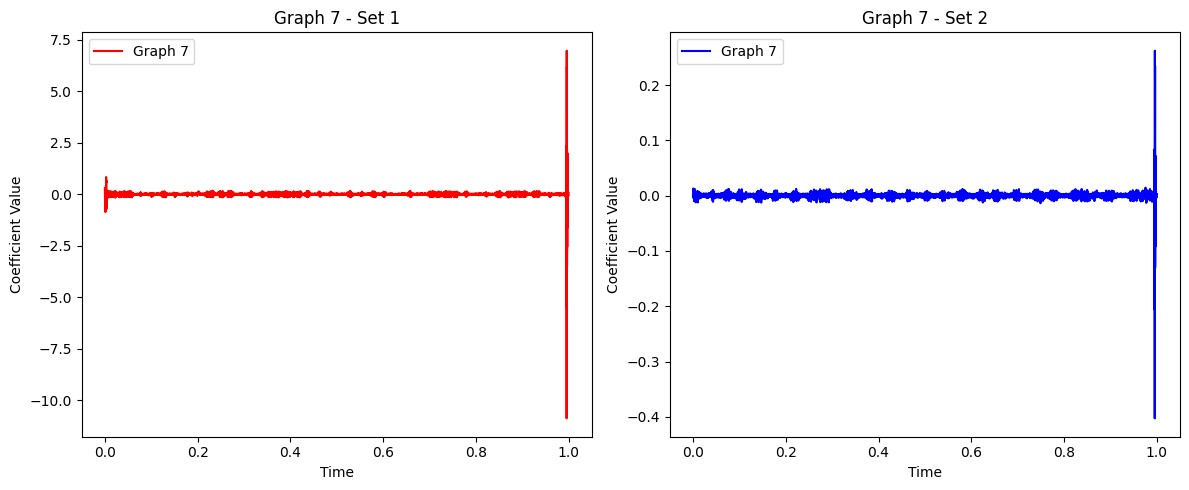

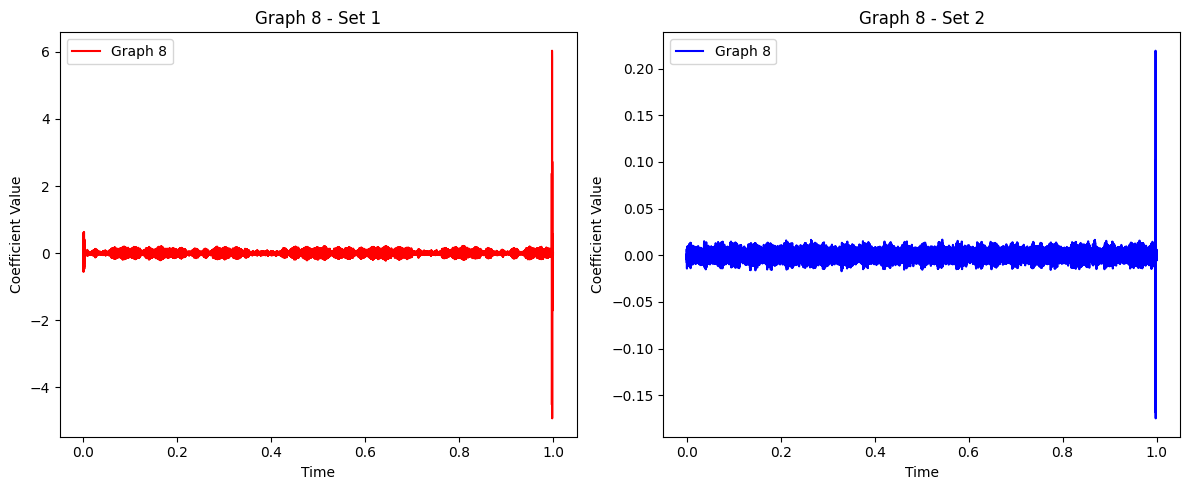

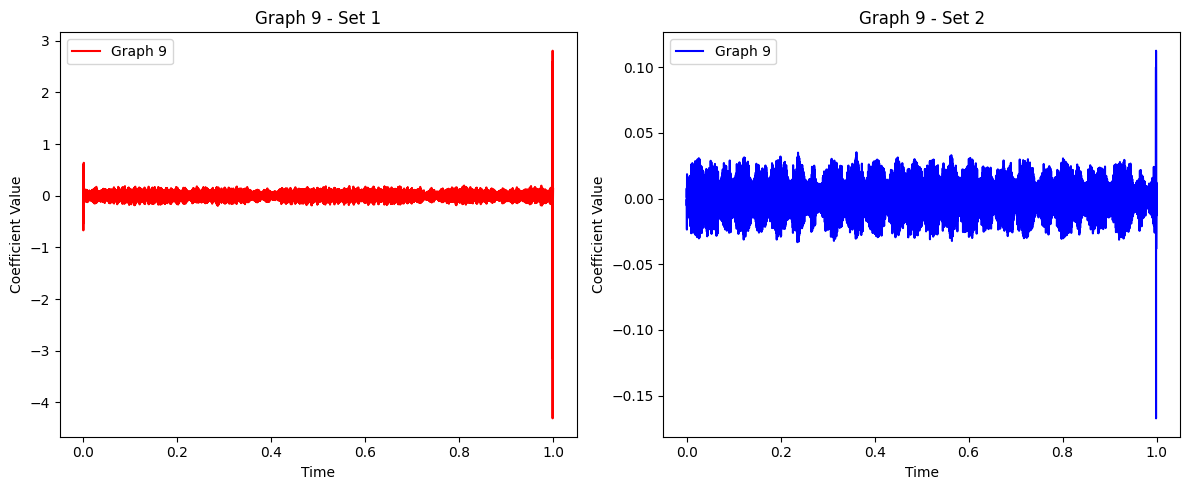

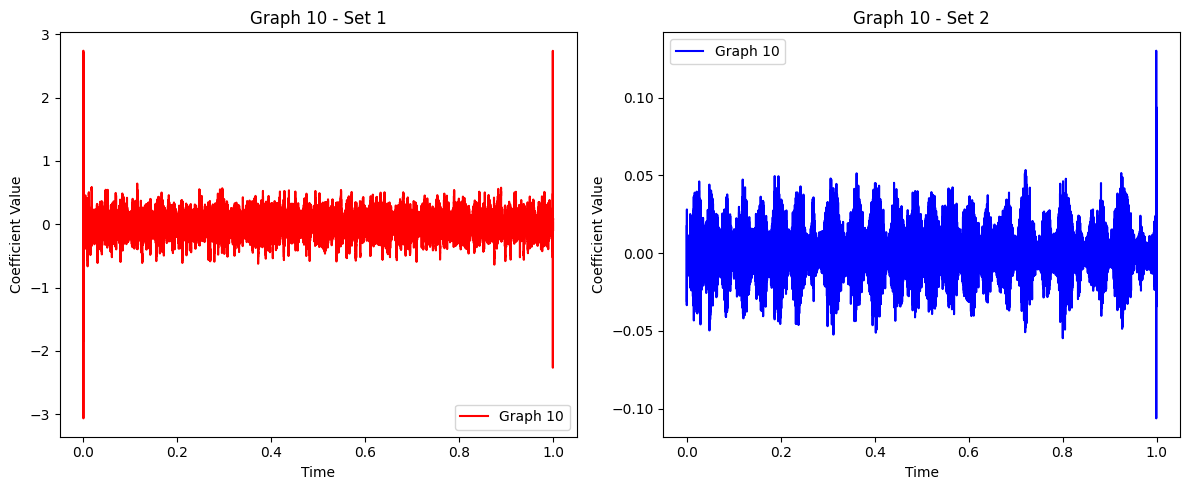

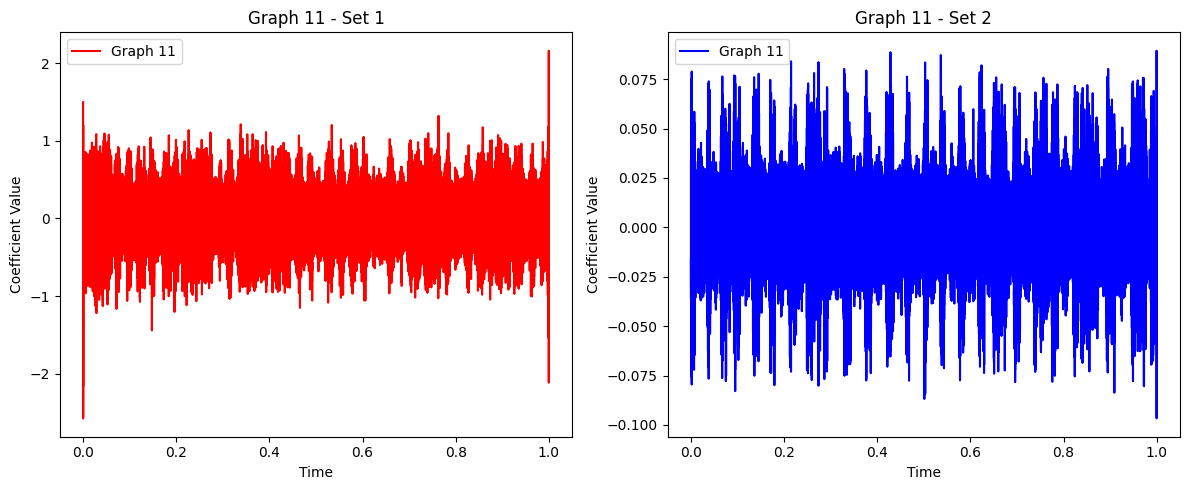

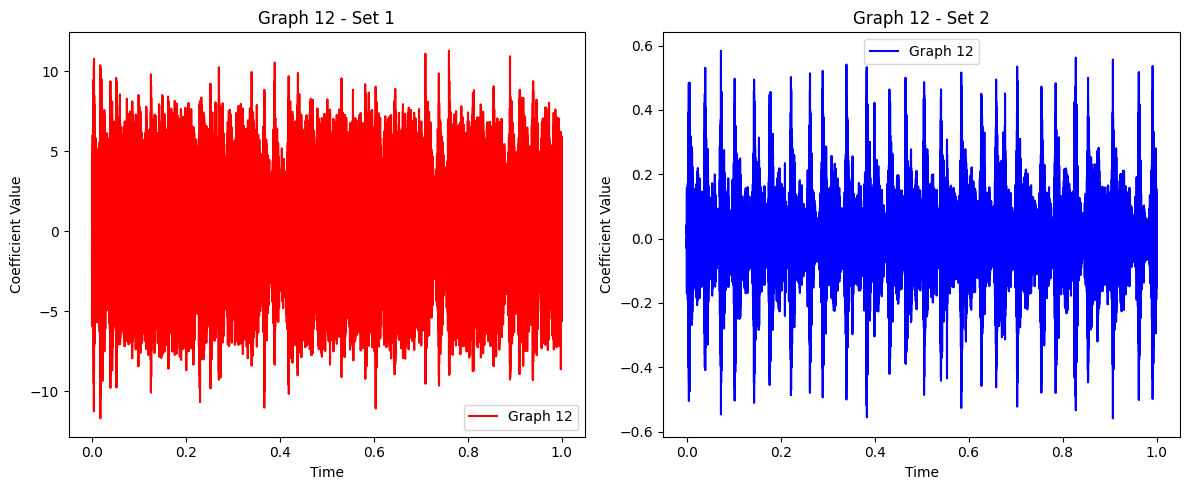

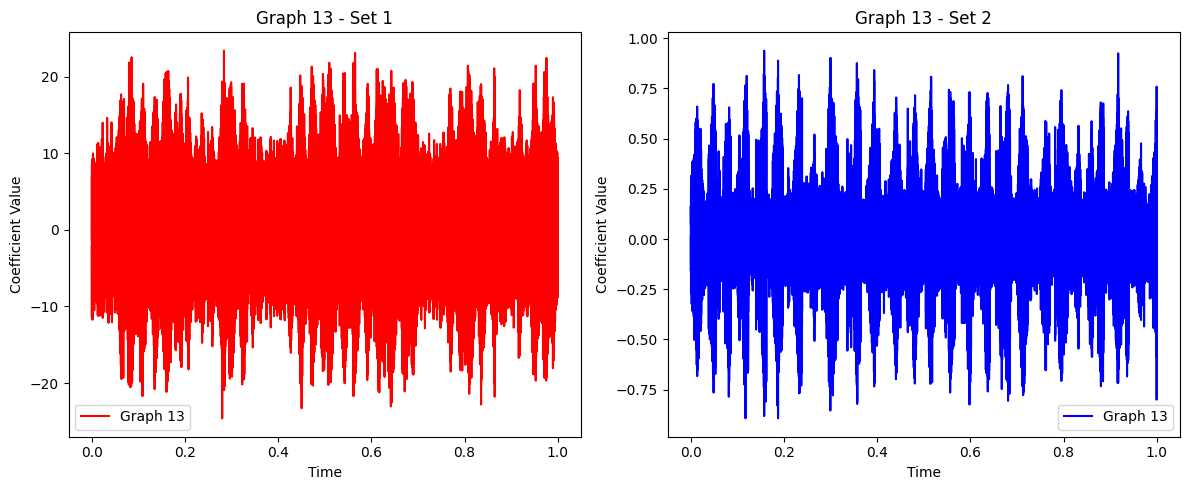

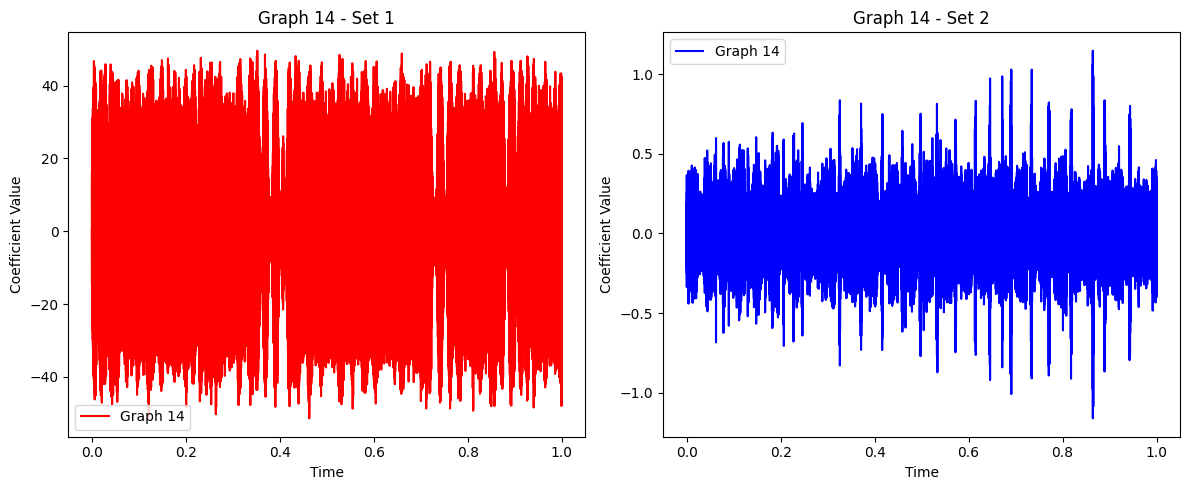

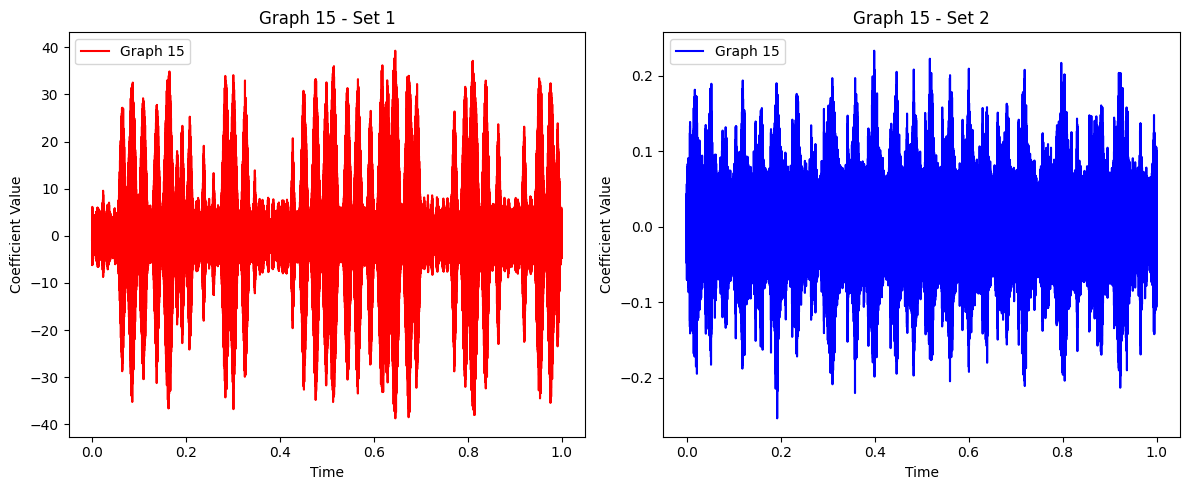

<ipython-input-27-f4ebad66a465>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Adjust the layout for better visualization
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


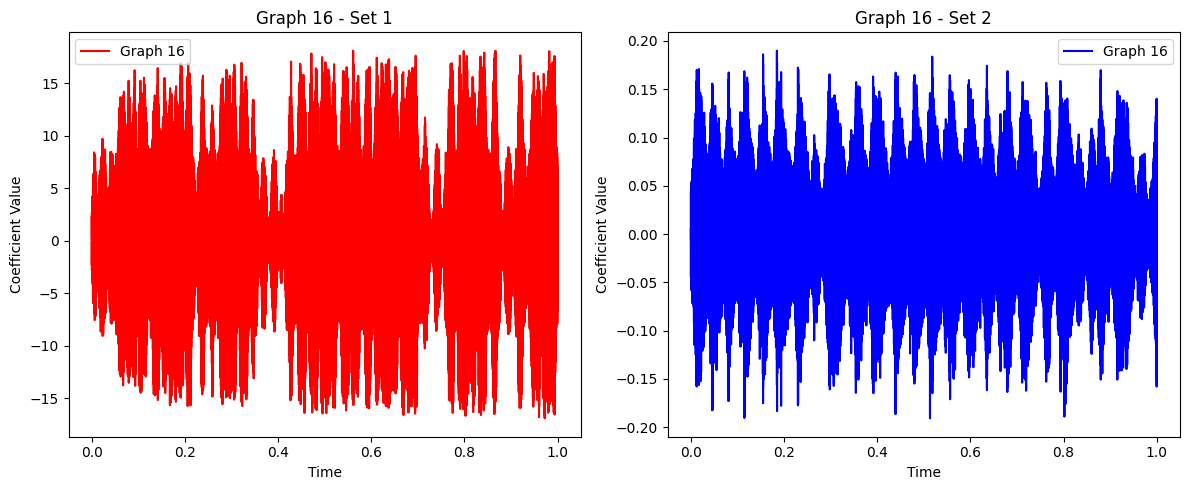

In [38]:
plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2)

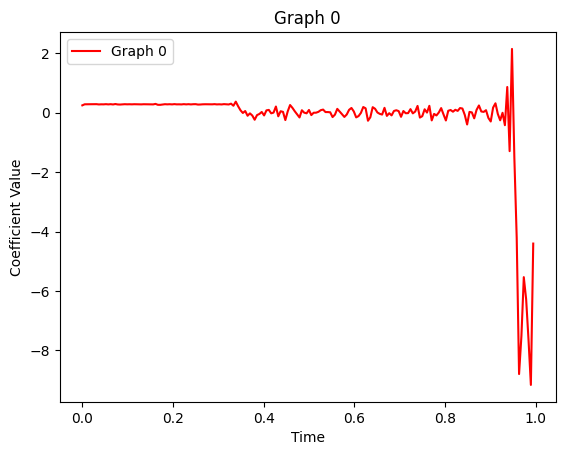

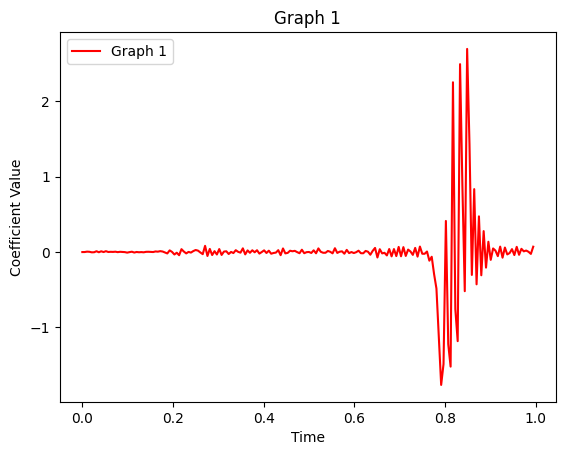

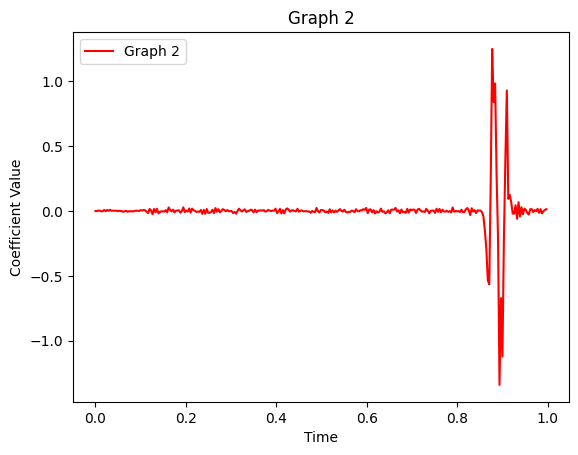

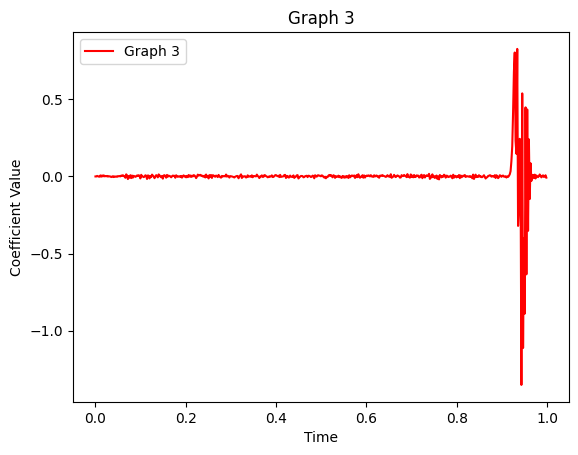

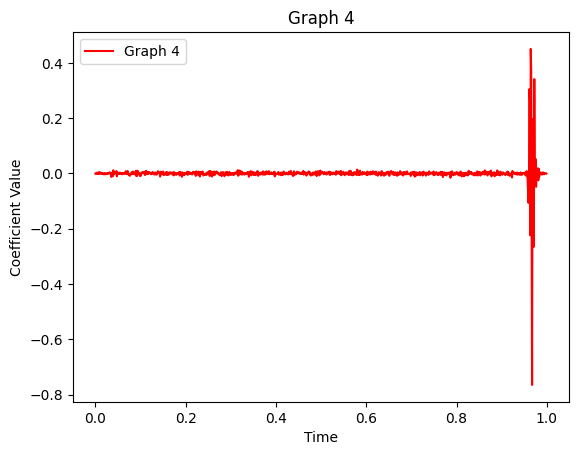

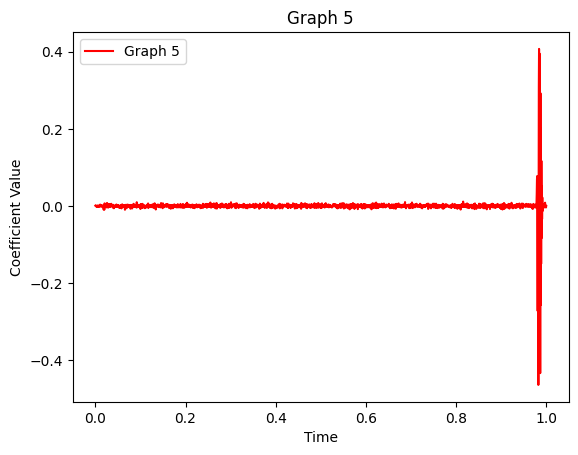

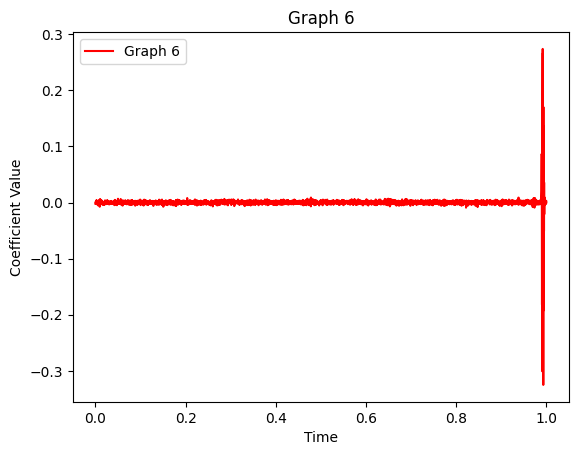

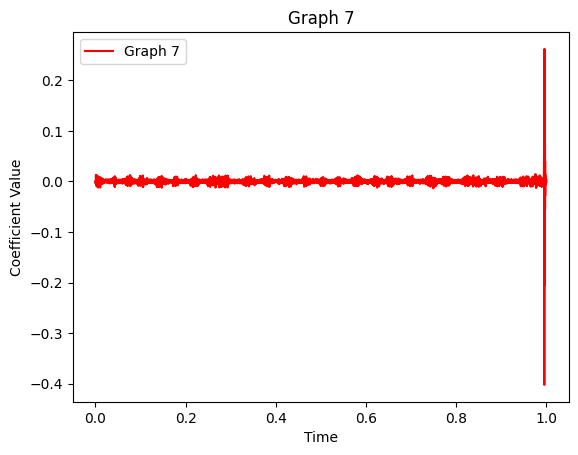

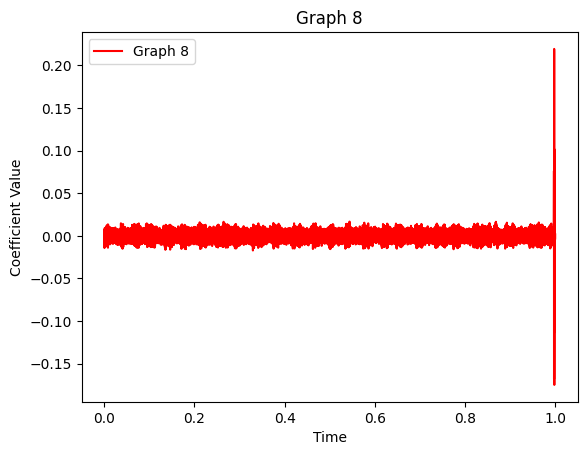

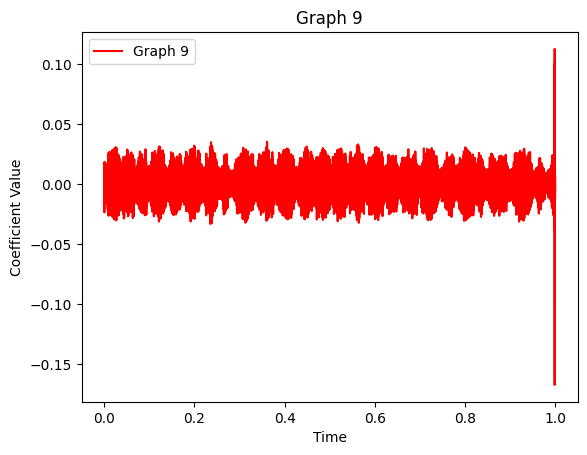

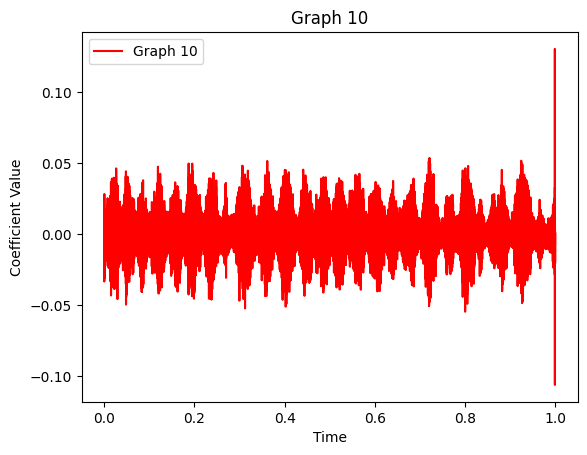

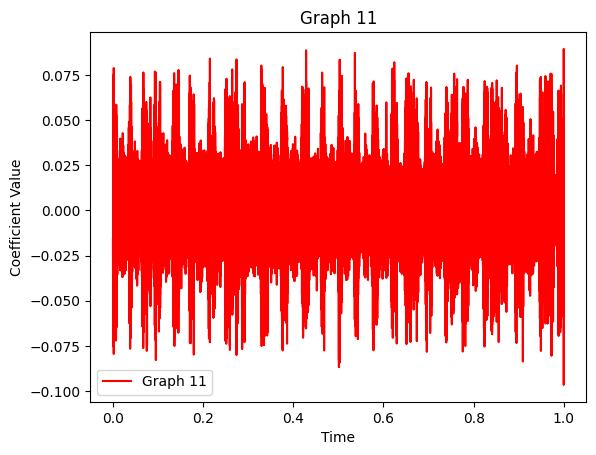

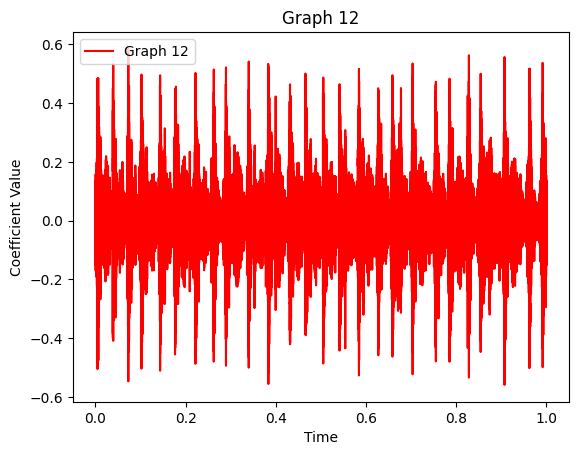

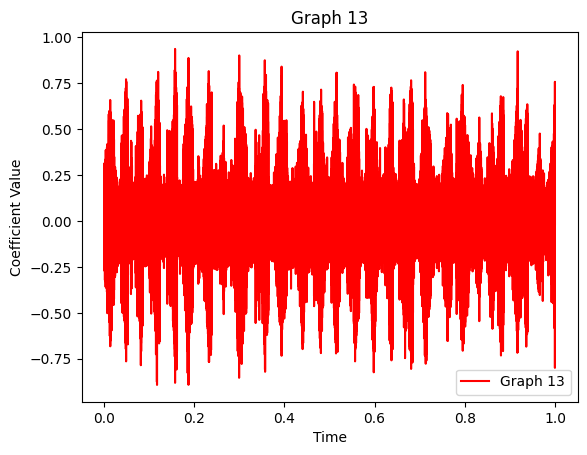

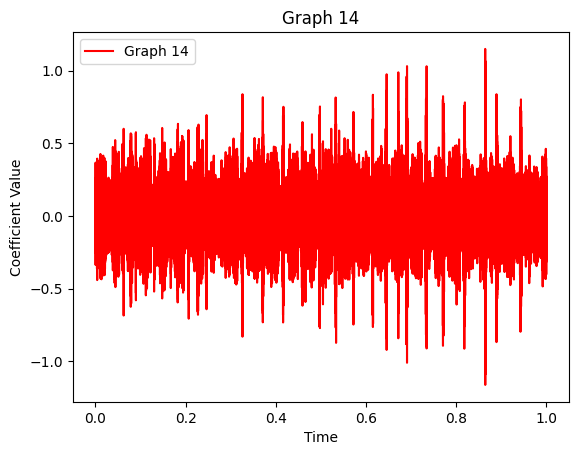

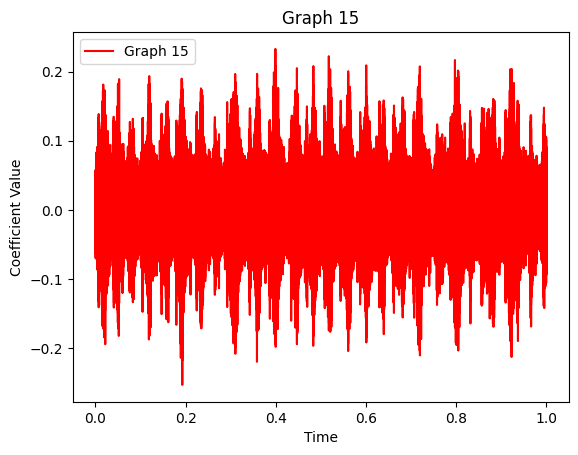

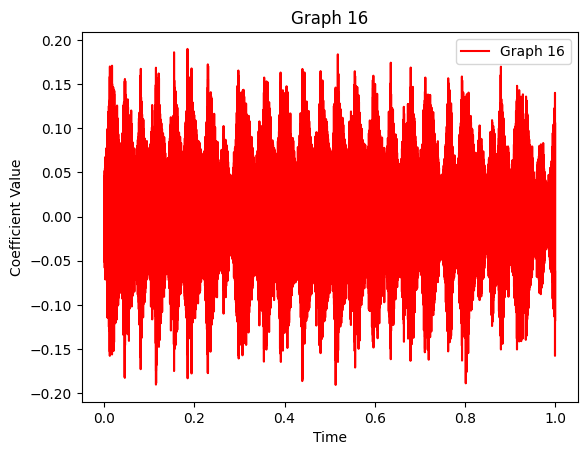

In [26]:
 plot_multiple_graphs_separate(time_arrays_2, coeffs_2 )